In [104]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [105]:
data = pd.read_csv(r"C:\Users\harsh\OneDrive\Documents\Electric_Vehicle_Population_Data (2).csv") #Reading the data 

In [106]:
data.head()

,City,Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,2020 Census Tract,Seats,PriceEuro,Exchange rate,Price(Rupee)
0,Hyderabad,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,4385,53061052121,5,29234,79.5,2324103.0
1,Kota,2016,MERCEDES-BENZ,C-CLASS,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,4777,53033004901,4,22030,79.5,1751385.0
2,Bangalore,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,10286,53053071307,4,41526,79.5,3301317.0
3,Patna,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,10734,53053940013,4,22030,79.5,1751385.0
4,Mumbai,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,12050,53007960201,5,29146,79.5,2317107.0


In [107]:
data.shape   # we have 104874 rows and 14 colums 

(104874, 14)

In [108]:
 data.describe() #Descriptive Stats

,Year,Electric Range,Base MSRP,DOL Vehicle ID,2020 Census Tract,Seats,PriceEuro,Exchange rate,Price(Rupee)
count,104874.000000,104874.000000,104874.000000,1.048740e+05,1.048740e+05,104874.000000,104874.000000,104874.0,1.048740e+05
mean,2018.626943,95.329262,2237.774329,1.976591e+08,5.296382e+10,4.889849,55976.422011,79.5,4.450126e+06
std,2.818063,103.150525,11592.671930,1.002775e+08,1.726390e+09,0.790943,34451.426289,0.0,2.738888e+06
min,1993.000000,0.000000,0.000000,4.385000e+03,1.101001e+09,2.000000,20129.000000,79.5,1.600256e+06
25%,2017.000000,0.000000,0.000000,1.421701e+08,5.303301e+10,5.000000,34400.000000,79.5,2.734800e+06
50%,2019.000000,42.000000,0.000000,1.828324e+08,5.303303e+10,5.000000,45000.000000,79.5,3.577500e+06
75%,2021.000000,210.000000,0.000000,2.099666e+08,5.305307e+10,5.000000,65000.000000,79.5,5.167500e+06
max,2023.000000,337.000000,845000.000000,4.792548e+08,5.603300e+10,7.000000,215000.000000,79.5,1.709250e+07


In [109]:
data.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104874 entries, 0 to 104873
Data columns (total 14 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   City                                               104874 non-null  object 
 1   Year                                               104874 non-null  int64  
 2   Make                                               104874 non-null  object 
 3   Model                                              104874 non-null  object 
 4   Electric Vehicle Type                              104874 non-null  object 
 5   Clean Alternative Fuel Vehicle (CAFV) Eligibility  104874 non-null  object 
 6   Electric Range                                     104874 non-null  int64  
 7   Base MSRP                                          104874 non-null  int64  
 8   DOL Vehicle ID                                     104874 non-null  int64 

In [110]:
data.isnull().sum().sort_values(ascending = False) #chceking missing values

City                                                 0
Year                                                 0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
DOL Vehicle ID                                       0
2020 Census Tract                                    0
Seats                                                0
PriceEuro                                            0
Exchange rate                                        0
Price(Rupee)                                         0
dtype: int64

###### We don't have any missing values

In [111]:
data.columns.values

array(['City', 'Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Electric Range', 'Base MSRP', 'DOL Vehicle ID',
       '2020 Census Tract', 'Seats', 'PriceEuro', 'Exchange rate',
       'Price(Rupee)'], dtype=object)

In [112]:
data = data.drop(['DOL Vehicle ID','Base MSRP', '2020 Census Tract','Exchange rate'],axis = 1) #dropping columns which are not needed

In [113]:
data

,City,Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Seats,PriceEuro,Price(Rupee)
0,Hyderabad,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,5,29234,2324103.0
1,Kota,2016,MERCEDES-BENZ,C-CLASS,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,4,22030,1751385.0
2,Bangalore,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,4,41526,3301317.0
3,Patna,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,4,22030,1751385.0
4,Mumbai,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,5,29146,2317107.0
...,...,...,...,...,...,...,...,...,...,...
104869,Mumbai,2020,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,5,45000,3577500.0
104870,Patna,2019,BENTLEY,BENTAYGA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,5,38105,3029347.5
104871,Bangalore,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,5,54475,4330762.5
104872,Surat,2019,WHEEGO ELECTRIC CARS,LIFE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,5,32646,2595357.0


In [114]:
#changing type 
data['City']=data['City'].astype('category')
data['Make']=data['Make'].astype('category')
data['Model']=data['Model'].astype('category')
data['Electric Vehicle Type']=data['Electric Vehicle Type'].astype('category')
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].astype('category')
data['Electric Range']=data['Electric Range'].astype('int')
data['Seats']=data['Seats'].astype('int')
data['Price(Rupee)']=data['Price(Rupee)'].astype('int')

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104874 entries, 0 to 104873
Data columns (total 10 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   City                                               104874 non-null  category
 1   Year                                               104874 non-null  int64   
 2   Make                                               104874 non-null  category
 3   Model                                              104874 non-null  category
 4   Electric Vehicle Type                              104874 non-null  category
 5   Clean Alternative Fuel Vehicle (CAFV) Eligibility  104874 non-null  category
 6   Electric Range                                     104874 non-null  int32   
 7   Seats                                              104874 non-null  int32   
 8   PriceEuro                                          104874 non-nu

In [116]:
print(f"Unique Values from 6 Columns:\
{pd.concat([data['City'],data['Year'],data['Make'],data['Model'],data['Electric Vehicle Type'],data['Clean Alternative Fuel Vehicle (CAFV) Eligibility']]).unique()}")

Unique Values from 6 Columns:['Hyderabad' 'Kota' 'Bangalore' 'Patna' 'Mumbai' 'Ahemdabad' 'Jaipur'
 'Gurgaon' 'Delhi' 'Chandigarh' 'Rajkot' 'Kolkata' 'Noida' 'Pune'
 'Coimbatore' 'Guwahati' 'Faridabad' 'Jamshedpur' 'Madurai' 'Dehradun'
 'Surat' 'Bhopal' 'Amritsar' 'Vishakhapatnam' 'Ranchi' 'Chennai'
 'Aurangabad' 'Indore' 'Thiruvananthapuram' 'Kanpur' 'Vadodra'
 'Bhubaneshwar' 'Lucknow' 'Ludhiana' 'Gwalior' 2017 2016 2013 2014 2018
 2012 2015 2008 2011 2019 2020 2002 2000 2010 2021 1998 2022 1999 2023
 1993 'FORD' 'MERCEDES-BENZ' 'NISSAN' 'CHEVROLET' 'Mahindra' 'BMW'
 'LINCOLN' 'AUDI' 'KIA' 'DODGE' 'SMART' 'TOYOTA' 'HYUNDAI' 'VOLVO'
 'FISKER' 'FIAT' 'MITSUBISHI' 'VOLKSWAGEN' 'CHRYSLER' 'PORSCHE' 'MINI'
 'CADILLAC' 'SUBARU' 'JAGUAR' 'HONDA' 'LAND ROVER' 'AZURE DYNAMICS' 'Audi'
 'BENTLEY' 'LUCID MOTORS' 'POLESTAR' 'JEEP' 'WHEEGO ELECTRIC CARS' 'TH!NK'
 'RIVIAN' 'FUSION' 'C-CLASS' 'LEAF' 'VOLT' 'MODEL 3' 'I3' 'FOCUS' '330E'
 'MODEL S' 'A3' 'SOUL EV' 'CORSAIR' 'NIRO' 'SOUL' 'CARAVAN' 'BOLT

In [117]:
data['Electric Range'].unique()

array([ 21, 200,  75,  38, 215,  53,  84,  72,  76,  14,  73, 208,  16,
       111, 210,   0,  93, 220, 238, 151,  19,  81, 265,  58,  87,  25,
        35,  27,   6,  13,  33,  17,  62, 107,  26, 125, 150, 204, 124,
        97,  82,  29,  12, 239,  83,  22, 249, 270,  36, 308, 266, 322,
       293, 258, 259, 234, 289, 126,  10,  47, 330,  18,  37, 153, 337,
        15,  28,  68, 114,  32,  20,   8,  40,  95,  31, 192, 103,  57,
       245, 149, 291, 100,  11, 170,   9, 110, 203,  56,  30, 218,  42,
       222, 233,  24,  48,  74,  23,  41,  59,  80])

In [118]:
data['Seats'].unique()

array([5, 4, 6, 7, 2])

In [119]:
data['Price(Rupee)'].unique()

array([ 2324103,  1751385,  3301317,  2317107,  9937500,  3331527,
        4253250,  3099466,  4571250,  3577500,  3975000,  5088000,
        5523978,  5409180,  6315877, 17092500,  3021000,  2975049,
        4372500,  3728550,  5615164,  5962500,  1702969,  3180000,
       14372089,  2855719,  1700266,  4410660,  2359719,  4887660,
        1970805,  3776250,  2774550,  2960341,  2981250,  2623261,
        1600255,  3022351,  5990404,  6490300,  2782500,  4660290,
        2595357,  1950453,  4804741,  2828212,  4330762,  2700694,
        5529304,  5354961,  2731699,  8689509,  2739490,  2536050,
       11845500,  4929000,  2928541,  2623500,  8187705,  3254412,
        3013050, 11925000,  6359205,  4486980,  5216790,  3029347,
        3243202, 11789929,  2643057,  5000550,  2027250,  8184127,
        2518639,  6836205,  2385000,  2479128,  5167500,  3687210,
        1952917,  2866531,  7635975,  4293000,  7457100,  2634073,
        8347500,  2734800,  7710705])

In [120]:
data['PriceEuro'].unique()

array([ 29234,  22030,  41526,  29146, 125000,  41906,  53500,  38987,
        57500,  45000,  50000,  64000,  69484,  68040,  79445, 215000,
        38000,  37422,  55000,  46900,  70631,  75000,  21421,  40000,
       180781,  35921,  21387,  55480,  29682,  61480,  24790,  47500,
        34900,  37237,  37500,  32997,  20129,  38017,  75351,  81639,
        35000,  58620,  32646,  24534,  60437,  35575,  54475,  33971,
        69551,  67358,  34361, 109302,  34459,  31900, 149000,  62000,
        36837,  33000, 102990,  40936,  37900, 150000,  79990,  56440,
        65620,  38105,  40795, 148301,  33246,  62900,  25500, 102945,
        31681,  85990,  30000,  31184,  65000,  46380,  24565,  36057,
        96050,  54000,  93800,  33133, 105000,  34400,  96990],
      dtype=int64)

In [121]:
data.loc[data['Electric Range'] == 0].value_counts()

City            Year  Make   Model    Electric Vehicle Type           Clean Alternative Fuel Vehicle (CAFV) Eligibility             Electric Range  Seats  PriceEuro  Price(Rupee)
Patna           2022  HONDA  CLARITY  Battery Electric Vehicle (BEV)  Eligibility unknown as battery range has not been researched  0               5      45000      3577500         19
                2021  HONDA  ACCORD   Battery Electric Vehicle (BEV)  Eligibility unknown as battery range has not been researched  0               5      45000      3577500         19
Hyderabad       2021  HONDA  CLARITY  Battery Electric Vehicle (BEV)  Eligibility unknown as battery range has not been researched  0               5      45000      3577500         17
Ahemdabad       2021  HONDA  ACCORD   Battery Electric Vehicle (BEV)  Eligibility unknown as battery range has not been researched  0               5      50000      3975000         17
Patna           2021  HONDA  ACCORD   Battery Electric Vehicle (BEV)  Eligibility

In [122]:
data=data.rename(columns={"Electric Range":"ERange"}) #Renaming Column

In [123]:
import statistics
def newErange(ERange):
    if ERange == 0:
        return data['ERange'].mean()
    else:
        return ERange

In [124]:
data['ERange']=data['ERange'].apply(newErange)

In [125]:
data.drop(data.index[[20]])

,City,Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,ERange,Seats,PriceEuro,Price(Rupee)
0,Hyderabad,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,5,29234,2324103
1,Kota,2016,MERCEDES-BENZ,C-CLASS,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,4,22030,1751385
2,Bangalore,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,4,41526,3301317
3,Patna,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,4,22030,1751385
4,Mumbai,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,5,29146,2317107
...,...,...,...,...,...,...,...,...,...,...
104869,Mumbai,2020,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,5,45000,3577500
104870,Patna,2019,BENTLEY,BENTAYGA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289.0,5,38105,3029347
104871,Bangalore,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,5,54475,4330762
104872,Surat,2019,WHEEGO ELECTRIC CARS,LIFE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,5,32646,2595357


In [126]:
data['ERange'].head(25)

0      21.000000
1     200.000000
2      75.000000
3      75.000000
4      38.000000
5     200.000000
6     215.000000
7      53.000000
8      84.000000
9      72.000000
10     76.000000
11    215.000000
12     75.000000
13     21.000000
14     14.000000
15     73.000000
16    208.000000
17     16.000000
18    111.000000
19    210.000000
20     95.329262
21    208.000000
22     84.000000
23     93.000000
24     84.000000
Name: ERange, dtype: float64

In [127]:
#Dividing PriceEuro into different class
def flag_df(data):
    
    if ( data['Price(Rupee)'] < 3500000) :
        return 'Sub-Economy'
    elif (3500000<= data['Price(Rupee)'] < 5500000):
        return 'Economy'
    elif (5500000 <= data['Price(Rupee)'] < 7500000 ):
        return 'Sub-Premium'
    elif (data['Price(Rupee)'] >= 7500000):
        return 'Premium'
    
data['Class'] = data.apply(flag_df, axis = 1)



In [128]:
data['Class'].unique()

array(['Sub-Economy', 'Premium', 'Economy', 'Sub-Premium'], dtype=object)

In [70]:
#data=data.dropna()

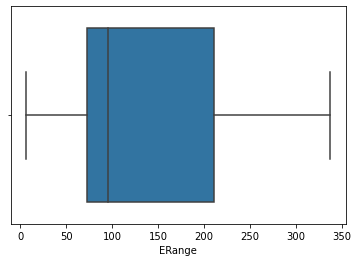

In [129]:
#checking outliers
ax = sns.boxplot(data['ERange'])


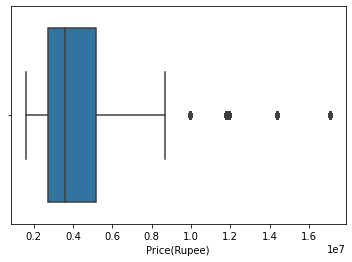

In [130]:
bx = sns.boxplot(data['Price(Rupee)'])


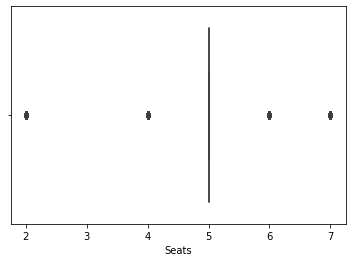

In [131]:
dx = sns.boxplot(data['Seats'])

In [132]:
 data.describe() #Descriptive Stats

,Year,ERange,Seats,PriceEuro,Price(Rupee)
count,104874.000000,104874.000000,104874.000000,104874.000000,1.048740e+05
mean,2018.626943,123.367013,4.889849,55976.422011,4.450125e+06
std,2.818063,84.741161,0.790943,34451.426289,2.738888e+06
min,1993.000000,6.000000,2.000000,20129.000000,1.600255e+06
25%,2017.000000,72.000000,5.000000,34400.000000,2.734800e+06
50%,2019.000000,95.329262,5.000000,45000.000000,3.577500e+06
75%,2021.000000,210.000000,5.000000,65000.000000,5.167500e+06
max,2023.000000,337.000000,7.000000,215000.000000,1.709250e+07


In [134]:
data

,City,Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,ERange,Seats,PriceEuro,Price(Rupee),Class
0,Hyderabad,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,5,29234,2324103,Sub-Economy
1,Kota,2016,MERCEDES-BENZ,C-CLASS,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,4,22030,1751385,Sub-Economy
2,Bangalore,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,4,41526,3301317,Sub-Economy
3,Patna,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,4,22030,1751385,Sub-Economy
4,Mumbai,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,5,29146,2317107,Sub-Economy
...,...,...,...,...,...,...,...,...,...,...,...
104869,Mumbai,2020,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,5,45000,3577500,Economy
104870,Patna,2019,BENTLEY,BENTAYGA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289.0,5,38105,3029347,Sub-Economy
104871,Bangalore,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,5,54475,4330762,Economy
104872,Surat,2019,WHEEGO ELECTRIC CARS,LIFE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,5,32646,2595357,Sub-Economy
